In [1]:
# libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import matplotlib.pyplot as plt

In [2]:
# preprocessing
(train_image,train_label),(test_image,test_label) = datasets.cifar10.load_data()

In [3]:
#print(train_image) #pixel values
#print(train_label.min(), " " , train_label.max())
#print(train_image.shape)

In [4]:
# Normalising pixel values from 0-255 to 0-1
train_image, test_image = train_image/255.0, test_image/255.0
#print(train_image)

In [5]:
# class name defined
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

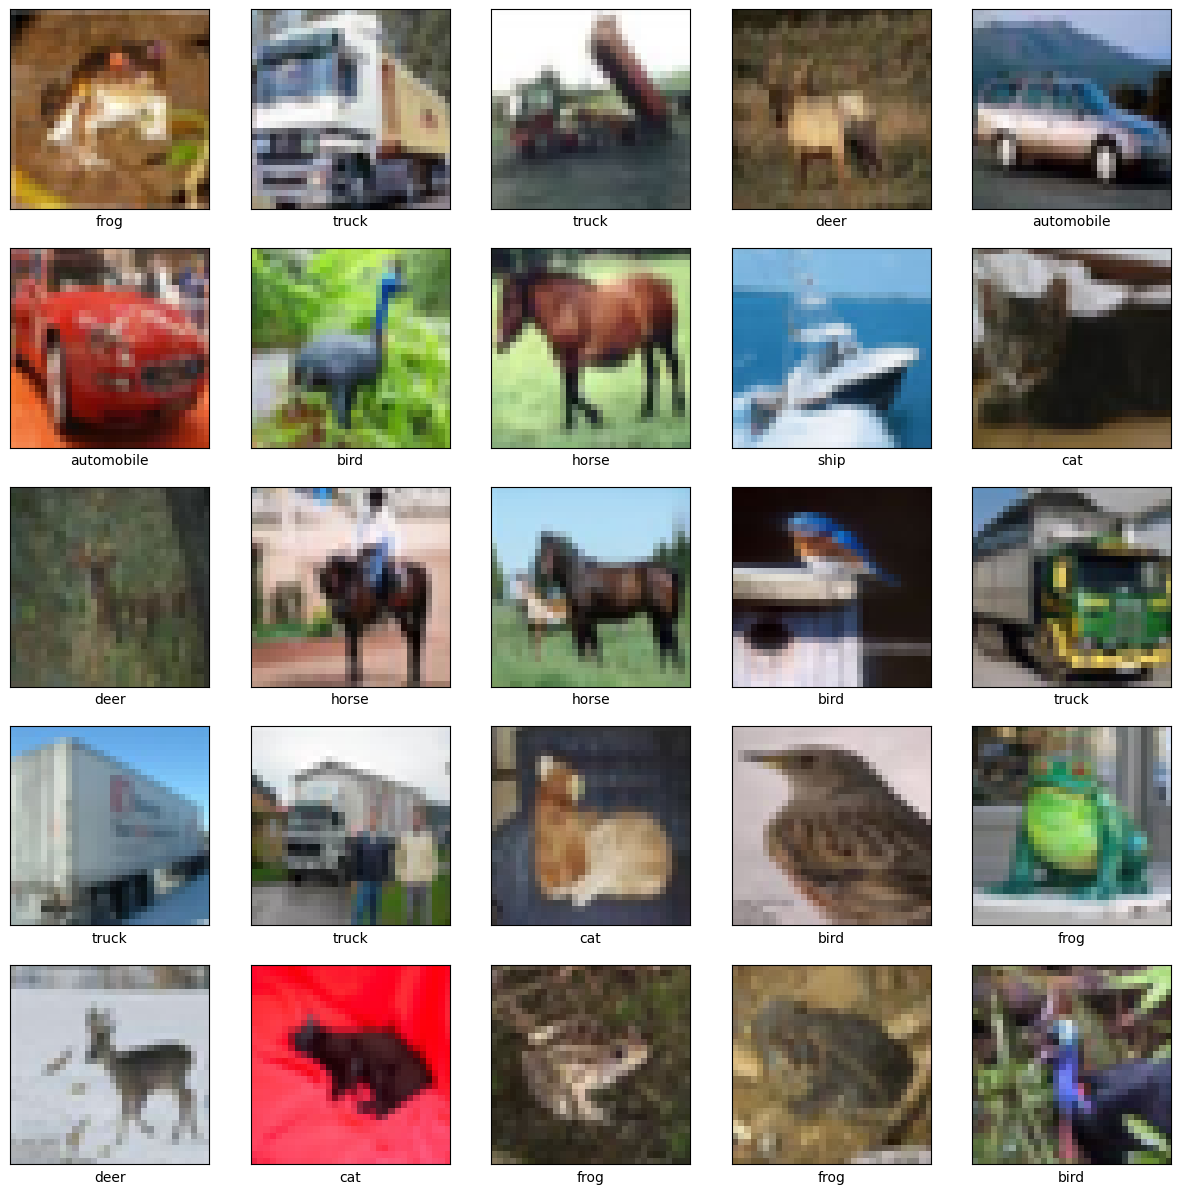

In [6]:
# image visualisation
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i],cmap = plt.cm.binary)
    plt.xlabel(class_name[train_label[i][0]])
plt.show()

In [7]:
#CNN model
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),   
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10)    
]    
)

C:\Users\Aditya Koul\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,874 (206.54 KB)

 Trainable params: 52,874 (206.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#compile
model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [10]:
#train
History = model.fit(train_image, train_label,epochs=10,validation_data=(test_image,test_label))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3301 - loss: 1.7952 - val_accuracy: 0.5173 - val_loss: 1.3214
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5464 - loss: 1.2750 - val_accuracy: 0.5765 - val_loss: 1.1822
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5991 - loss: 1.1362 - val_accuracy: 0.6126 - val_loss: 1.0754
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6365 - loss: 1.0350 - val_accuracy: 0.6366 - val_loss: 1.0373
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6585 - loss: 0.9714 - val_accuracy: 0.6457 - val_loss: 1.0086
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6742 - loss: 0.9254 - val_accuracy: 0.6595 - val_loss: 0.9742
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6921 - loss: 0.8751 - val_accuracy: 0.6594 - val_loss: 0.9867
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7052 - loss: 0

In [11]:
test_loss, test_acc = model.evaluate(test_image, test_label)
print(f"Test accuracy is : {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6889 - loss: 0.8953
Test accuracy is : 0.6901999711990356


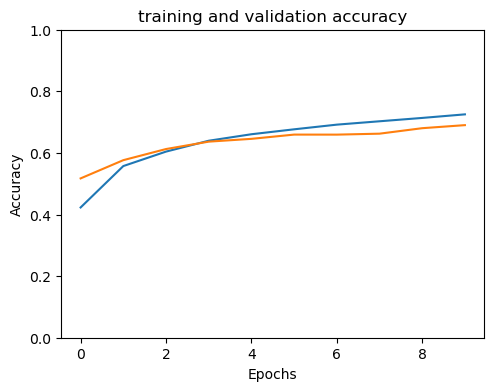

In [12]:
# testing visualisation
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.title("training and validation accuracy")
plt.plot(History.history['accuracy'],label='accuracy')
plt.plot(History.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.show()
